<h1 style="
    font-family: 'Playfair Display', serif; 
    color: #B30000; 
    font-size: 66px; 
    font-weight: bold; 
    letter-spacing: 1px; 
    text-shadow: 1px 1px 2px #2A0F0F;">
    anatomy of a blockbuster
</h1>

<h3 style="
    font-family: 'DejaVu Sans', monospace; 
    color: #CCCCCC; 
    font-size: 25px; 
    margin-top: -7px;  
    margin-bottom: 12px;
    text-shadow: 1px 1px 1px #888888;">
    exploring decades of cinematic change through data, because analyzing 45,000 movies is easier than watching them.
</h3>

⠀⠀⠀⠀⠀⠀
# **1. Setup, data loading and cleaning**

In this section, we prepare the environment for our analysis and load the movies dataset.  
We import essential libraries for data handling (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), and system path management (`sys`, `os`).  

We then load a custom `load_and_clean_data` function from the `src/` directory and apply it to our movie metadata file.  
Finally, we perform basic inspections of the dataset (checking the first rows, the shape, and the data types) to ensure the data has been correctly imported and structured for subsequent analysis.

In [1]:
#SETUP
#standard library
import sys
import os
#data handling
import pandas as pd
import numpy as np
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
sns.set_style("darkgrid")     #set theme for plots 
plt.rcParams["font.family"] = "DejaVu Sans"    #font
plt.rcParams["figure.figsize"] = (12, 7)    #the default figure size

#SRC IMPORT (LOAD AND CLEAN)
sys.path.append(os.path.abspath("../src"))  
from load_and_clean_data import load_and_clean_data
#load data
file_path = "../data/movies_metadata.csv"
df = load_and_clean_data(file_path)
#check the first rows of the dataframe to verify data loaded correctly and columns are present
df.head()
#check the shape of the dataframe (rows, columns) and data types
df.shape
df.info()

dataset loaded successfully :) first 5 rows:
   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                    

# **2. Exploratory data analysis (EDA)**


## **2.1  distributions**

In this section, we' analyze the **distributions** of key numerical variables in the movies dataset:
- **budget** – the total cost to produce a movie, including cast, crew, sets, and post-production expenses.  
- **revenue** – the total income a movie generates from box office sales, streaming, and other distribution channels.  
- **profit** – the difference between revenue and budget; it reflects the actual financial gain of a movie. It can also be negative, in which case the movie incurs a loss.  
- **return on Investment (ROI)** – the ratio of profit to budget, is a key financial metric that measures the efficiency of an investment. In the context of movies, ROI quantifies how much profit a film generates relative to its production budget:

studying these distributions allows us to spot patterns and peculiarities in the data. This exploration sets the stage for deeper analyses, helping us understand not only how movies perform financially but also how audience reception relates to budget, revenue, and profitability.

**Note:** I use a logarithmic scale for the distributions of budget and revenue because these values span several orders of magnitude. 
The log scale compresses large ranges, making patterns, clusters, and outliers easier to visualize and interpret.

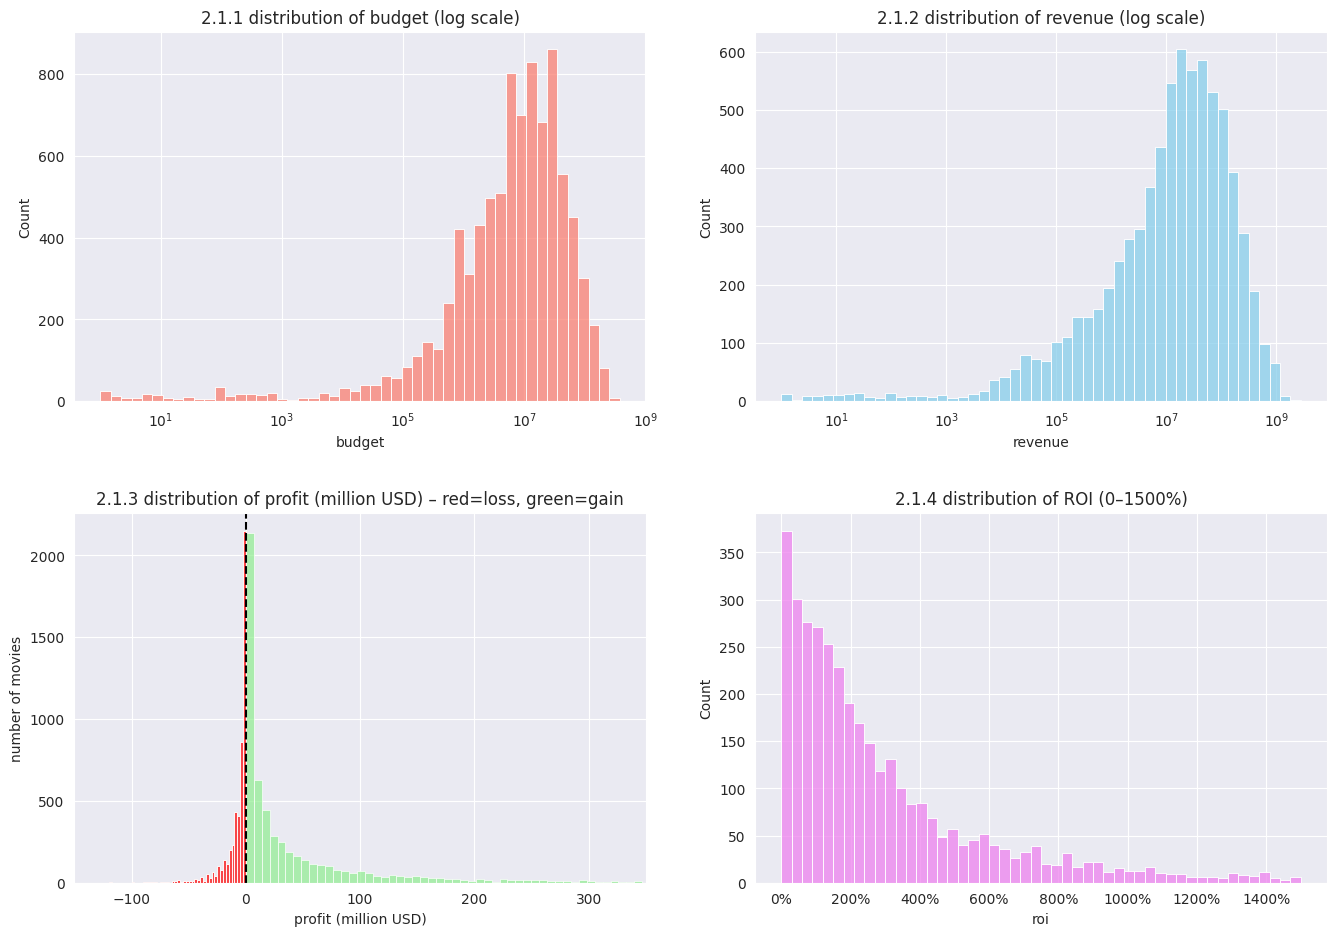

In [2]:
import matplotlib.ticker as mtick

#2.1 DISTRIBUTIONS
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#2.1.1 BUDGET (log scale)
sns.histplot(df['budget'].replace(0, np.nan), log_scale=True, bins=50, ax=axes[0,0], color='salmon')
axes[0,0].set_title("2.1.1 distribution of budget (log scale)")

#2.1.2 REVENUE (log scale)
sns.histplot(df['revenue'].replace(0, np.nan), log_scale=True, bins=50, ax=axes[0,1], color='skyblue')
axes[0,1].set_title("2.1.2 distribution of revenue (log scale)")

#2.1.3 PROFIT
profit_plot = df['profit'].replace(0, np.nan).dropna()
profit_plot_limited = profit_plot[(profit_plot > -1.5e8) & (profit_plot < 3.5e8)]  # -150M to 350M
profit_plot_million = profit_plot_limited / 1e6
#split negative and non-negative profits
profit_neg = profit_plot_million[profit_plot_million < 0]
profit_pos = profit_plot_million[profit_plot_million >= 0]
#plot
sns.histplot(profit_neg, bins=50, color='red', alpha=0.7, ax=axes[1,0])
sns.histplot(profit_pos, bins=50, color='lightgreen', alpha=0.7, ax=axes[1,0])
axes[1,0].set_title("2.1.3 distribution of profit (million USD) – red=loss, green=gain")
axes[1,0].set_xlabel("profit (million USD)")
axes[1,0].set_ylabel("number of movies")
axes[1,0].set_xlim(-150, 350)  #extend into negative
axes[1,0].axvline(0, color='black', linestyle='--', linewidth=1.5)  #highlight 0

#2.1.4 ROI (filter out invalid roi values (nan, inf, -inf)
roi_valid = df['roi'].replace([np.inf, -np.inf], np.nan).dropna()
roi_plot = roi_valid[(roi_valid >= 0) & (roi_valid <= 15)]
sns.histplot(roi_plot, bins=50, ax=axes[1,1], color='violet')
axes[1,1].set_title("2.1.4 distribution of ROI (0–1500%)")
axes[1,1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout(pad=3.0, h_pad=3.0, w_pad=3.0)

some considerations we got from these graphs:
- most movies are produced with budgets in the vicinity of 10⁷ USD, while only a handful reach exceptionally high production costs.  
- revenues tend to concentrate between 10⁷ and 10⁸ USD, suggesting that the majority of films achieve moderate commercial success.  
- profit distribution reveals that many movies barely break even, whereas a small group of blockbusters dominates the upper end of the spectrum. (fun fact: *Avatar*’s theoretical gross profit is approximately 2,680 million USD.)  
- return on Investment (ROI) is generally below 1,500%. Extremely high values, like 1,500%, indicate that a film earned 15 times its production cost, and they typically appear as outliers for very successful or low-budget hits.

⠀⠀⠀⠀⠀⠀
## **2.2 trends over time**
In this section, we examine how key aspects of movies have evolved over the years.  
We filter out years with very few releases to ensure reliable statistics, then compute yearly aggregates for:
- number of movies released  
- average budget
- average revenue  
- average return on investment (ROI)  
- average audience rating  

**line plots** are used to visualize temporal trends, allowing us to detect patterns, fluctuations, and potential anomalies in the production, financial performance, and reception of movies over time.

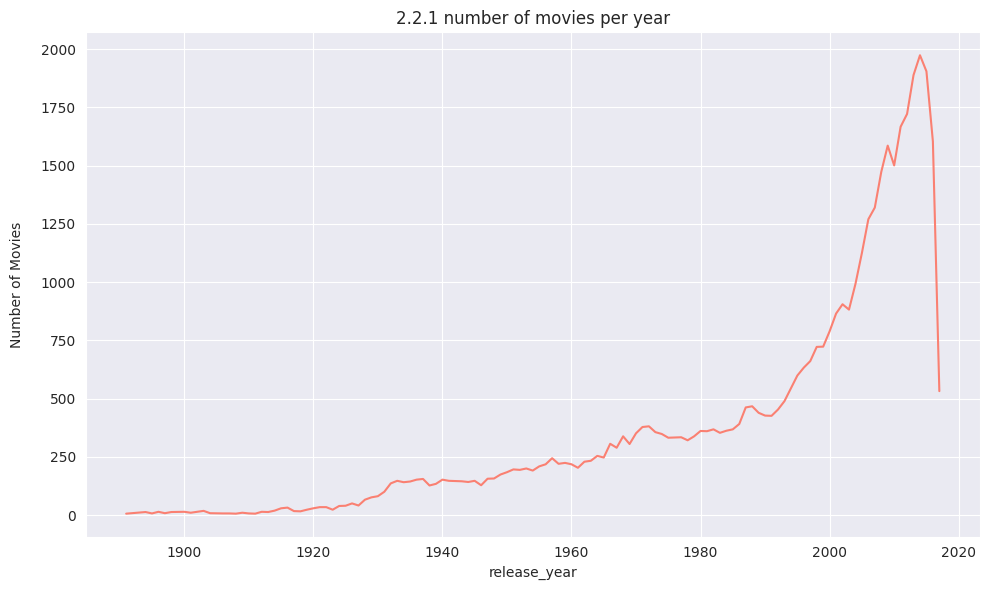

In [3]:
#2.2 TRENDS OVER TIME
df_years = df.groupby('release_year').filter(lambda x: len(x) > 5)
df_yearly = df_years.groupby('release_year').agg(
    n_movies=('title', 'count'),
    avg_budget=('budget', 'mean'),
    avg_revenue=('revenue', 'mean'),
    avg_roi=('roi', 'mean'),
    avg_vote=('vote_average', 'mean')
).reset_index()

#2.2.1 NUMBER OF MOVIES PER YEAR
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_yearly, x='release_year', y='n_movies', ax=ax, color='salmon')
ax.set_title("2.2.1 number of movies per year")
ax.set_ylabel("Number of Movies", labelpad=12)
plt.tight_layout()
plt.show()

From the 1990s onward, there is a sharp increase in the number of movies released each year. 
This trend reflects both the growth of global film production and improved documentation: many older films were lost, poorly archived, or not included in modern databases. 
The surge becomes particularly noticeable from the 2000s, when DVDs, digital distribution, and online databases made releases more reliably recorded.

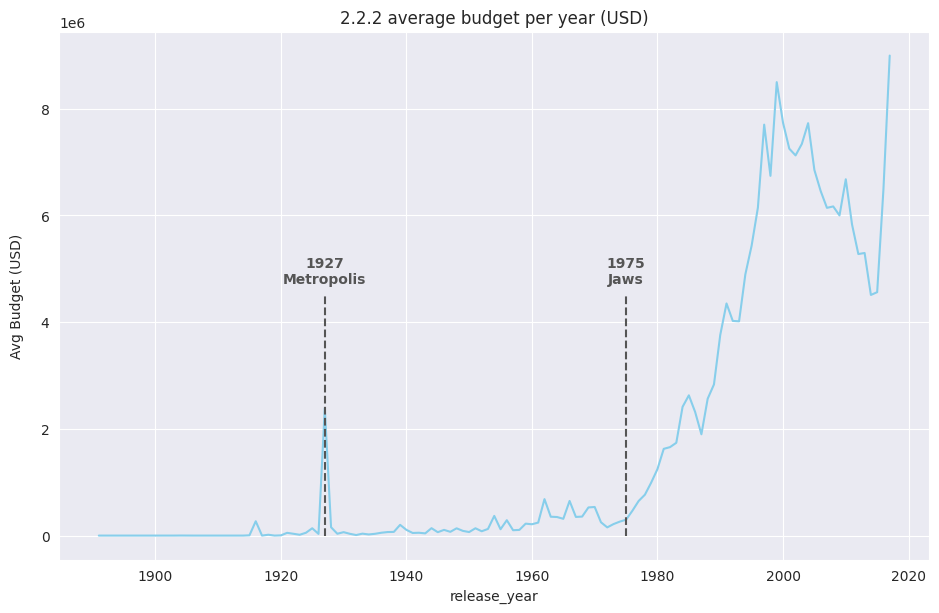

In [4]:
#2.2.2 AVERAGE BUDGET X YEAR
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_yearly, x='release_year', y='avg_budget', ax=ax, color='skyblue')
ax.set_title("2.2.2 average budget per year (USD)")
ax.set_ylabel("Avg Budget (USD)", labelpad=12)
# mid-height for dashed lines
mid_height = df_yearly['avg_budget'].max() / 2
#highlight "jaws" (1975)
ax.vlines(x=1975, ymin=0, ymax=mid_height, color='#555555', linestyle='--', linewidth=1.5)
ax.text(
    1975,
    mid_height * 1.05,
    "1975\nJaws",
    horizontalalignment='center',
    color='#555555',
    fontsize=10,
    fontweight='bold'
)
#highlight "metropolis" (1927)
ax.vlines(x=1927, ymin=0, ymax=mid_height, color='#555555', linestyle='--', linewidth=1.5)
ax.text(
    1927,
    mid_height * 1.05,
    "1927\nMetropolis",
    horizontalalignment='center',
    color='#555555',
    fontsize=10,
    fontweight='bold'
)
#adjust margins for centering
plt.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.07, hspace=0.35)
plt.show()

### In the average budget per year plot, two historically significant movies are highlighted
<div style="height: 20px;"></div> 

<div style="display: flex; justify-content: center; gap: 30px;">
    <div style="text-align: center;">
        <img src="images/metropolis.jpg" alt="Metropolis" width="300px">
        <p style="margin-top: 10px;">1927<br>Metropolis</p>
    </div>
    <div style="text-align: center;">
        <img src="images/jaws.jpg" alt="Jaws" width="300px">
        <p style="margin-top: 10px;">1975<br>Jaws</p>
    </div>
</div>

- **Metropolis (1927)** – directed by Fritz Lang, this science-fiction epic was the most expensive film ever made at the time of its release. It is the only pre-1930 movie in the dataset capable of significantly raising the average budget for its year.  

- **Jaws (1975)** – 0ften referred to as the first blockbuster of all time, Jaws set the standard for high-budget, high-return commercial films. Its release is a milestone in cinematic history, creating the modern concept of a "blockbuster."

It also opened the doors to increasing production budgets for subsequent films. This shift is clearly visible in the average budget per year plot, where we can notice a marked difference before and after the release of *Jaws*.

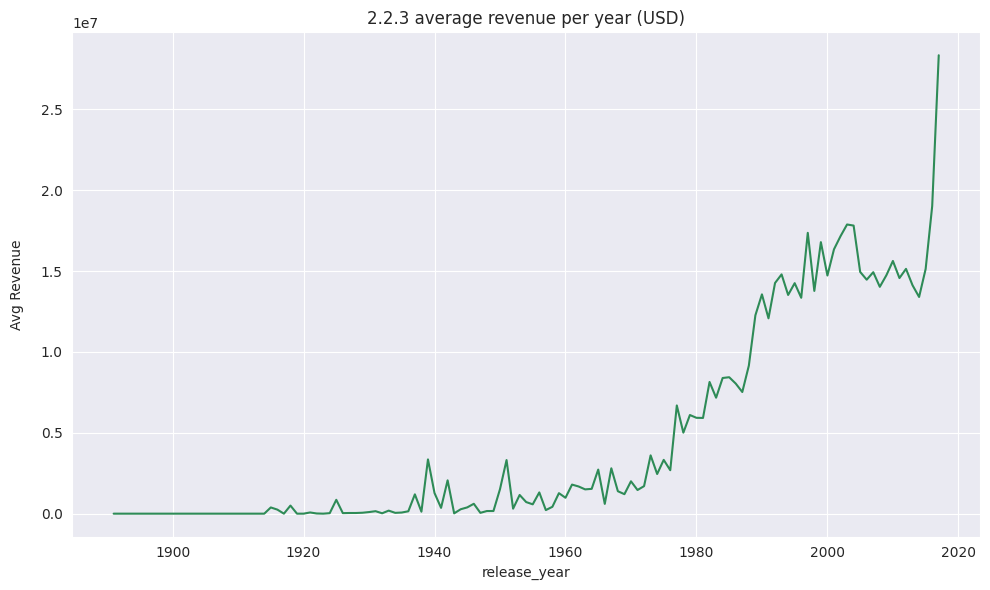

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
# 2.2.3 AVERAGE REVENUE PER YEAR
sns.lineplot(data=df_yearly, x='release_year', y='avg_revenue', ax=ax, color='seagreen')
ax.set_title("2.2.3 average revenue per year (USD)")
ax.set_ylabel("Avg Revenue", labelpad=12) 
plt.tight_layout()
plt.show()

After observing the average revenue per year, we notice a sharp increase starting around 2015. This surge can be explained by several factors. 
- First, the global box office experienced a significant boom, largely driven by major franchises and high-budget blockbusters that attracted audiences worldwide.
- nternational markets, particularly in Asia-Pacific, expanded rapidly, increasing the potential audience for each release. Third, higher ticket prices and the growing popularity of premium formats like 3D and IMAX contributed to higher revenue per film.
- the dominance of “tentpole” movies, with wide distribution and strong marketing campaigns, further boosted the average revenue.

Overall, this peak reflects a combination of market expansion, premium pricing, and blockbuster-driven revenue growth, rather than a sudden increase in the number of films released.

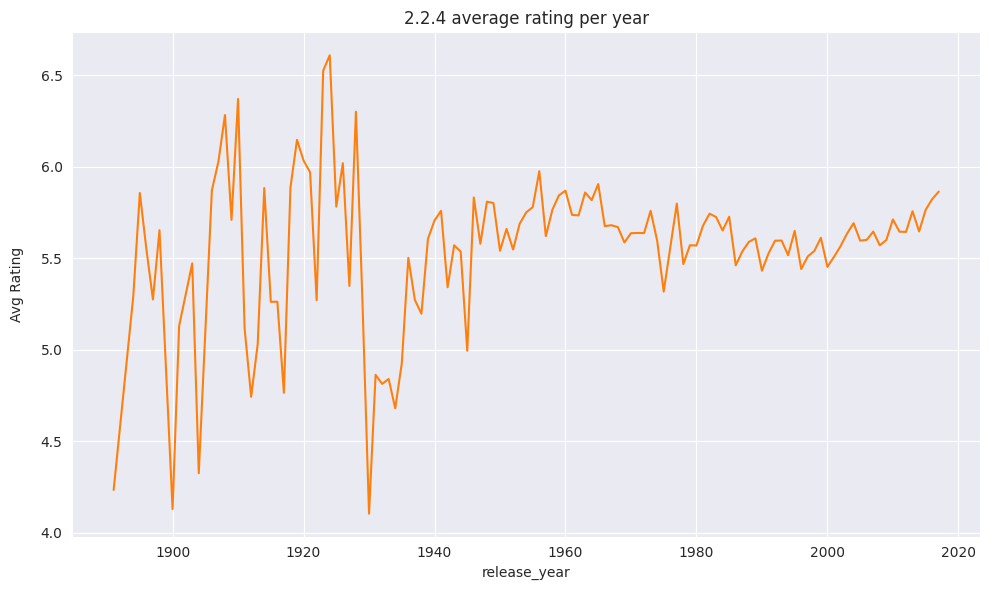

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

# 2.2.4 AVERAGE RATING PER YEAR
sns.lineplot(data=df_yearly, x='release_year', y='avg_vote', ax=ax, color='#FF7F0E')
ax.set_title("2.2.4 average rating per year")
ax.set_ylabel("Avg Rating", labelpad=12)

plt.tight_layout()
plt.show()

we can observe that the average rating per year is highly discontinuous before 1940, with large swings caused by the scarcity and incompleteness of available data. many early films were lost, poorly documented, or had very few reviews, so even a single film could drastically affect the yearly average.\
from 1950 onwards, ratings become much more stable, mostly ranging between 5.5 and 6.0, reflecting the increased availability of reviews and a more comprehensive dataset.

also that the notable increase in average budget starting from 1975, following the success of *jaws*, did not lead to a corresponding rise in average ratings. this suggests that higher production costs do not necessarily translate into better critical reception, highlighting the complex relationship between financial investment and audience or critic appreciation.

**Note**: interestingly, some early years with very few surviving films show surprisingly high ratings, likely due to the fact that only the most acclaimed films "survived"


⠀⠀⠀⠀⠀⠀
## **2.3 Genres**
in this section, we explore how movies are distributed across different genres and analyze key economic metrics for each genre, including average profit, budget, and revenue. by examining these statistics, we can identify which genres are the most produced, the most profitable, and those with the highest financial investment or returns, providing insights into trends and priorities in the film industry.

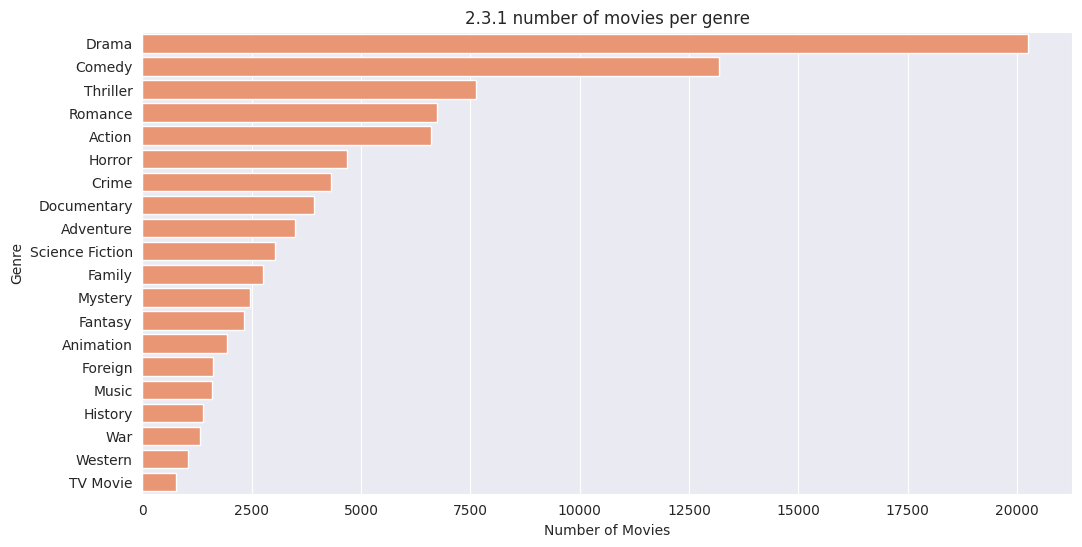

In [35]:
#2.3 GENRES
genre_stats = df.explode('genre_names').groupby('genre_names').agg(
    n_movies=('title', 'count'),
    avg_profit=('profit', 'mean'),
    avg_budget=('budget', 'mean'),
    avg_revenue=('revenue', 'mean')
).sort_values('n_movies', ascending=False)

#2.3.1 NUMBER OF MOVIES X GENRE
plt.figure(figsize=(12,6))
sns.barplot(
    x='n_movies',
    y=genre_stats.index,
    data=genre_stats.reset_index(),
    color=sns.color_palette("Set2")[1],  # usa colore singolo senza palette
)
plt.title("2.3.1 number of movies per genre")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

we can observe that the majority of movies belong to the **drama** genre. this is not surprising, as drama films often require relatively **modest budgets** and appeal to a wide audience, making them easier to produce in large numbers over the decades. their prevalence is reflected in the high count of titles within this category.

**note:** **Ingmar Bergman** is widely regarded as one of the most important directors in the drama genre. his work, spanning several decades, has profoundly influenced the portrayal of human emotion, existential themes, and complex characters in cinema.\
In Italy, we have also had a great master of drama, **Michelangelo Antonioni**, whose famous "trilogy of incomunicability" (l’avventura, l’eclissi, and la notte) explores alienation, modernity, and complex psychological landscapes.






 <div style="text-align: center;">
    <img src="images/bergmanantonioni.jpg" alt="Bergman & Antonioni" style="width: 60%;">
    <div style="display: flex; justify-content: space-between; width: 60%; margin: 0 auto; font-size: small;">
        <span>Bergman</span>
        <span>Antonioni</span>
    </div>
</div>

in the top 3 least represented genres in our dataset, we find tv movies, war, and western. each of these genres faces specific production or distribution constraints that limit their overall number:
- **tv movies**: these films are typically made for television rather than theatrical release, which means they often have lower budgets, shorter production cycles, and limited international distribution. as a result, datasets focusing on theatrical films underrepresent them.
- **war films**: production requires large-scale sets, authentic costumes, special effects, and sometimes cooperation with military consultants. the high cost and logistical complexity mean fewer war films are made, especially outside major studio systems.
- **western films**: while extremely popular during the mid-20th century, the western genre has seen a decline in production in recent decades due to changing audience tastes and the rise of other popular genres like action and adventure. historical dominance doesn’t translate into large modern datasets.



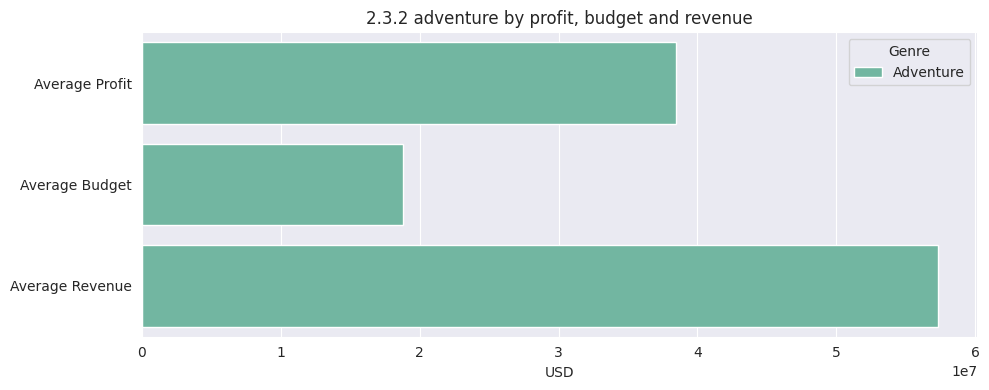

In [38]:
#2.3.2 MOST PROFITABLE GENRE (adventure)
#create a summary dataframe for profitability, budget, and revenue per genre
summary_genre = pd.DataFrame({
    "Metric": ["Average Profit", "Average Budget", "Average Revenue"],
    "Genre": [
        genre_stats['avg_profit'].idxmax(),
        genre_stats['avg_budget'].idxmax(),
        genre_stats['avg_revenue'].idxmax()
    ],
    "Value": [
        genre_stats['avg_profit'].max(),
        genre_stats['avg_budget'].max(),
        genre_stats['avg_revenue'].max()
    ]
})
#plot the summary as a horizontal bar chart
plt.figure(figsize=(10,4))
sns.barplot(
    x='Value',
    y='Metric',
    hue='Genre',
    data=summary_genre,
    dodge=False,
    palette="Set2"
)
plt.title("2.3.2 adventure by profit, budget and revenue")
plt.xlabel("USD")
plt.ylabel("")
plt.tight_layout()
plt.show()

on the other hand, **adventure** appears as the most profitable genre on average. this can be explained by the fact that adventure films, while less frequent than drama, often involve large-scale productions, high-stakes storytelling, and international appeal, which can generate substantial box office revenue. big-budget adventure movies, such as franchises or epic productions, tend to produce high profits relative to their production cost, even if they are fewer in number. 

even before the era of modern blockbuster cinema, epic adventure films such as **Lawrence of Arabia** (1962) already had immense appeal, demonstrating the enduring power of spectacle and grand narratives in capturing public interest.
directors like David Lean, exemplify the early mastery of large-scale cinematic storytelling, bridging the gap between classical epic filmmaking and the modern blockbuster tradition.

⠀⠀⠀⠀⠀

<div style="display: flex; justify-content: center; gap: 20px;">
    <div style="text-align: center;">
        <img src="images/lawrence1.jpg" alt="⠀⠀⠀⠀⠀" width="480px">
        <p>⠀⠀⠀⠀⠀</p>
    </div>
    <div style="text-align: center;">
        <img src="images/lawrence2.jpeg" alt="⠀⠀⠀⠀⠀" width="420px">
        <p>⠀⠀⠀⠀⠀</p>
    </div>
</div>

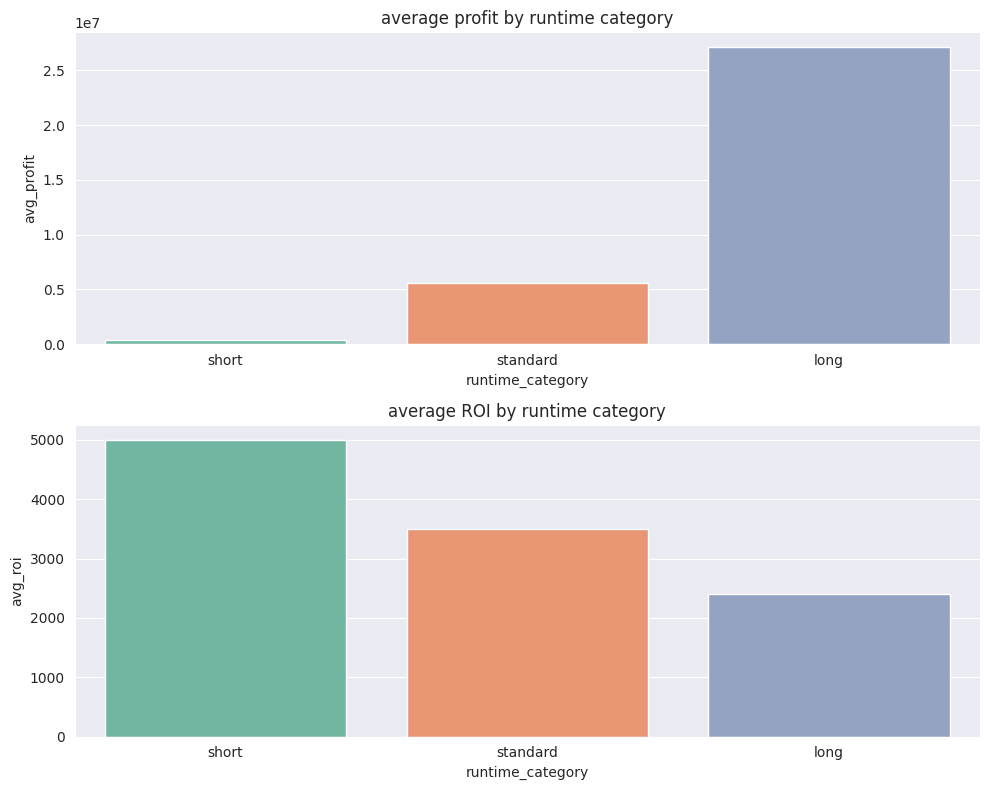

In [37]:
#2.4.1 RUNTIME
runtime_stats = df.groupby('runtime_category', observed=True).agg(
    avg_profit=('profit', 'mean'),
    avg_roi=('roi', 'mean')
).reset_index()
fig, axes = plt.subplots(2, 1, figsize=(10,8))
sns.barplot(data=runtime_stats, x='runtime_category', y='avg_profit', hue='runtime_category', dodge=False, palette='Set2', ax=axes[0], legend=False)
axes[0].set_title("average profit by runtime category")
sns.barplot(data=runtime_stats, x='runtime_category', y='avg_roi', hue='runtime_category', dodge=False, palette='Set2', ax=axes[1], legend=False)
axes[1].set_title("average ROI by runtime category")
plt.tight_layout()
plt.show()

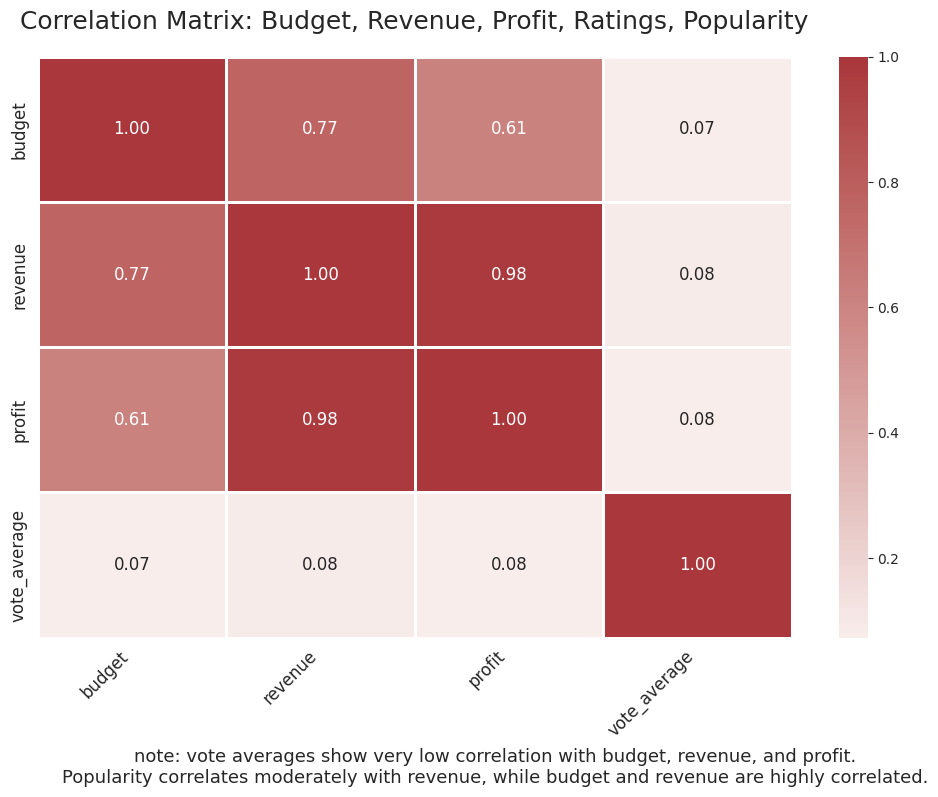

In [5]:
# CORRELATION ANALYSIS WITH BOTTOM NOTE
import matplotlib.pyplot as plt
import seaborn as sns
# seleziona le colonne numeriche rilevanti
numeric_cols = ['budget', 'revenue', 'profit', 'vote_average']
if 'popularity' in df.columns:
    numeric_cols.append('popularity')
#correlation matrix
corr_matrix = df[numeric_cols].corr()
#create heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='vlag',   
    center=0, 
    linewidths=1,         
    linecolor='white',    
    annot_kws={"size":12},
    ax=ax
)
# formattazione assi
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.set_title("Correlation Matrix: Budget, Revenue, Profit, Ratings, Popularity", fontsize=18, pad=20)
# note
fig.text(
    0.5, 0.01,  
    "note: vote averages show very low correlation with budget, revenue, and profit.\n"
    "Popularity correlates moderately with revenue, while budget and revenue are highly correlated.",
    fontsize=13,
    ha='center',
    va='bottom',
    fontname='DejaVu Sans'
)
plt.tight_layout(rect=[0,0.05,1,1])
plt.show()